Random Forest is like a team of decision-making trees working together to make predictions. Each tree looks at a random part of the data and makes its own guess. Then, all the trees vote on the final answer. It's great because it's good at handling lots of different kinds of data and doesn't get easily confused by noise. Plus, it can tell us which features are most important for making predictions.







## Data Loading and Exploration:
loaded datasets using load_digits() and load_iris() from sklearn.datasets.
Converted the datasets into pandas DataFrame for easy manipulation and exploration.
inspected the structure of the datasets using methods like head().


In [1]:
import pandas as pd 
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
df = pd.DataFrame(digits.data)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Data Preparation:
Separated the features (x) and target variable (y) from the datasets.
Split the data into training and testing sets using train_test_split() from sklearn.model_selection.


In [5]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
x = df.drop('target',axis ='columns')

In [7]:
x

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [8]:
y = df.target

In [9]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [12]:
len(x_train)

1437

In [13]:
len(x_test)

360

In [14]:
len(x)

1797

## Model Training:
Used RandomForestClassifier() from sklearn.ensemble to create a random forest model.
Trained the model using the training data with the fit() method.

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

## Model Evaluation:
Evaluated the model's performance on the testing data using score() method to get accuracy.
Generated predictions using the trained model on the testing data.
Calculated the accuracy of the model using accuracy_score() from sklearn.metrics.
Created a confusion matrix to visualize the model's performance in terms of true positives, false positives, true negatives, and false negatives using confusion_matrix().


In [16]:
model.score(x_test, y_test)

0.975

In [17]:
y_predicted = model.predict(x_test)
y_predicted

array([7, 9, 2, 8, 6, 1, 1, 4, 4, 9, 5, 8, 6, 0, 8, 2, 6, 4, 3, 1, 9, 1,
       8, 8, 3, 4, 3, 5, 3, 0, 4, 8, 7, 7, 7, 5, 0, 9, 8, 6, 8, 9, 6, 1,
       5, 0, 3, 7, 1, 9, 7, 2, 6, 5, 5, 2, 4, 9, 7, 5, 4, 6, 8, 9, 2, 0,
       4, 1, 6, 4, 5, 5, 9, 6, 5, 4, 4, 7, 4, 7, 8, 0, 4, 0, 4, 3, 0, 3,
       3, 1, 4, 5, 8, 2, 4, 1, 7, 3, 2, 2, 1, 1, 7, 2, 9, 8, 0, 4, 2, 8,
       8, 8, 0, 1, 8, 7, 0, 3, 8, 0, 7, 4, 7, 0, 9, 6, 8, 1, 1, 2, 6, 3,
       5, 7, 0, 8, 6, 1, 6, 6, 6, 0, 5, 4, 4, 4, 5, 4, 6, 7, 7, 9, 5, 2,
       3, 3, 2, 9, 2, 9, 1, 3, 4, 1, 6, 2, 6, 5, 6, 8, 2, 7, 4, 9, 5, 3,
       3, 4, 4, 7, 6, 4, 3, 2, 5, 5, 4, 7, 0, 6, 9, 8, 6, 2, 5, 1, 3, 5,
       7, 0, 3, 6, 9, 2, 4, 3, 1, 3, 1, 8, 9, 5, 0, 1, 4, 7, 7, 9, 7, 7,
       4, 8, 8, 6, 8, 1, 1, 4, 8, 0, 2, 5, 1, 6, 4, 3, 4, 9, 0, 2, 6, 8,
       0, 2, 9, 3, 4, 4, 2, 1, 5, 9, 5, 9, 3, 7, 1, 2, 7, 2, 0, 2, 9, 0,
       3, 4, 0, 0, 7, 6, 9, 3, 7, 9, 7, 8, 3, 1, 3, 8, 0, 1, 3, 6, 4, 1,
       1, 2, 3, 8, 8, 1, 2, 6, 3, 8, 6, 6, 4, 8, 5,

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 36,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  1, 32]], dtype=int64)

## Visualization:
Visualized the confusion matrix using seaborn and matplotlib.
Used a heatmap to display the confusion matrix with annotated values for better interpretation

In [19]:
%pip install seaborn

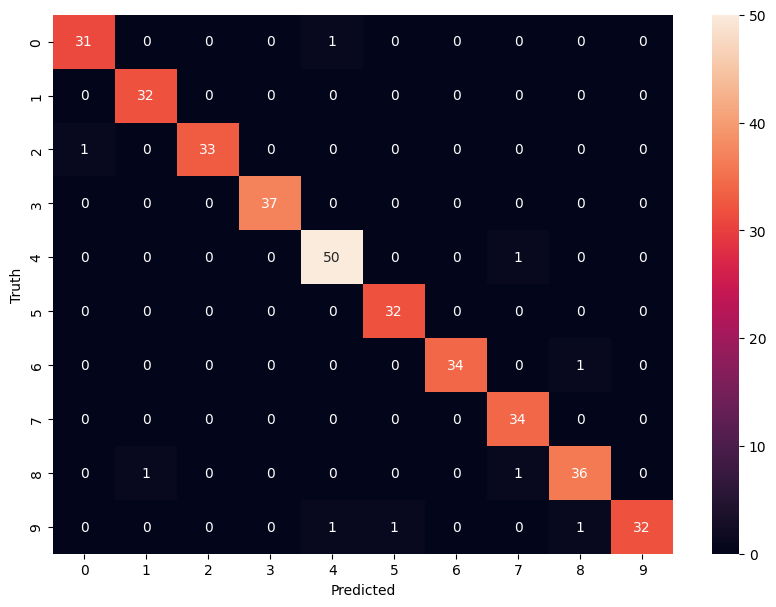

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')  
plt.ylabel('Truth')      
plt.show()


# excersize

In [21]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn


In [22]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [23]:
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [24]:
x = df.drop('target', axis=1)
y = df.target


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [26]:
model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

In [27]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 1.0


In [28]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


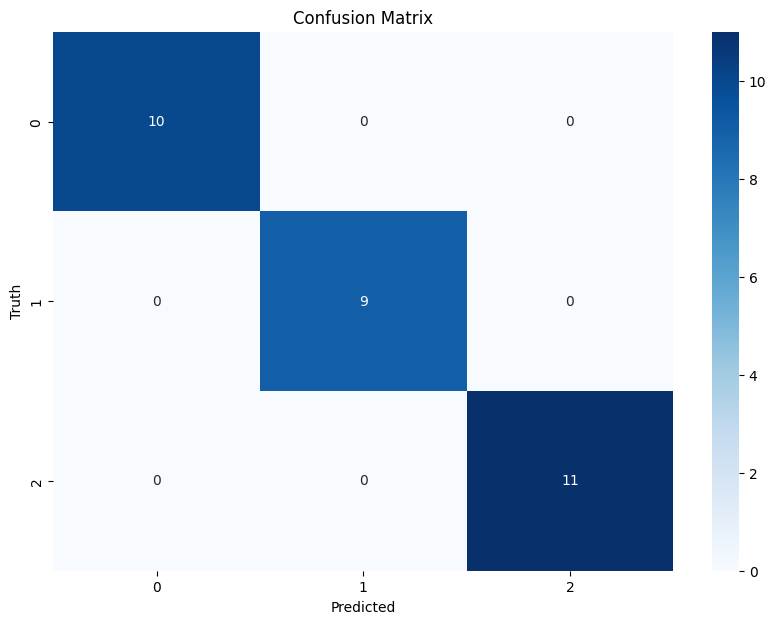

In [29]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()
